In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Dataset

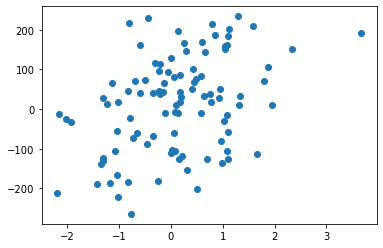

In [6]:
x,y =make_regression(n_samples = 100, n_features=2, noise=10)

plt.scatter(x[:,0],y)

In [9]:
print(x.shape)
print(y.shape)
y=y.reshape(y.shape[0],1   )
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [22]:
## Matrice X
X = np.hstack((x, np.ones((x.shape[0],1))))
print(X.shape)
print(X[ : 10])

(100, 3)
[[ 0.24784522  1.45092722  1.        ]
 [ 0.29647304  1.41755447  1.        ]
 [ 0.20385788  0.32124632  1.        ]
 [-0.50770764  0.91779724  1.        ]
 [-0.76124426 -2.53563634  1.        ]
 [-1.02176579 -1.78638971  1.        ]
 [ 0.95495654  0.09462813  1.        ]
 [ 1.33349463 -0.08815178  1.        ]
 [ 0.00496292  1.44028796  1.        ]
 [-0.79604165  0.20754032  1.        ]]


In [23]:
# Iniialisation de vecteur theta aléatoire
theta= np.random.randn(3,1)
theta

array([[ 0.45371469],
       [-2.08159153],
       [ 0.57992022]])

# Modele

Modele de regression polynomial
$$
y=ax^2+bx+c
$$

In [24]:
def model(X, theta):
    return np.dot(X,theta) # prediction= model(X, theta_final) #X.dot(theta)
    

In [31]:
m=model(X, theta)


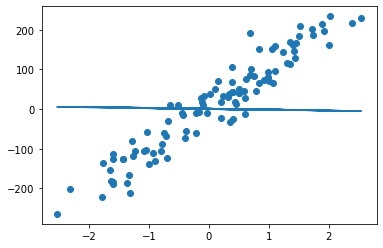

In [27]:
plt.scatter(x[:,1],y)
plt.plot(x[:,1],model(X,theta))

# Fonction cout

In [28]:
def cost_function(x, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum(( model(X,theta) - y )**2)

In [29]:
cost_function(x,y, theta)


7471.338943569388

# Gradients et Descente de Gradient

In [30]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X, theta)-y)

In [31]:
def grad_descent(X,y, theta, learning_rate, n_iterations):
    cost_history= np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta, cost_history

# Machine learning

In [32]:

theta_final, cost_history=grad_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
theta_final, 
cost_history

array([7271.04873915, 7076.20050625, 6886.64564317, 6702.23962102,
       6522.84187172, 6348.31567926, 6178.52807374, 6013.34972852,
       5852.65486008, 5696.3211307 , 5544.22955379, 5396.26440181,
       5252.31311677, 5112.2662232 , 4976.01724341, 4843.46261522,
       4714.5016119 , 4589.03626426, 4466.97128496, 4348.21399486,
       4232.67425144, 4120.26437913, 4010.89910158, 3904.49547585,
       3800.97282831, 3700.25269237, 3602.25874792, 3506.91676242,
       3414.15453359, 3323.90183374, 3236.09035557, 3150.65365948,
       3067.52712233, 2986.64788764, 2907.95481708, 2831.38844339,
       2756.89092454, 2684.40599912, 2613.87894305, 2545.25652739,
       2478.48697738, 2413.51993251, 2350.30640782, 2288.79875615,
       2228.95063148, 2170.71695328, 2114.0538718 , 2058.91873438,
       2005.27005261, 1953.06747045, 1902.27173321, 1852.84465736,
       1804.74910121, 1757.94893634, 1712.4090199 , 1668.09516755,
       1624.97412727, 1583.01355381, 1542.18198385, 1502.44881

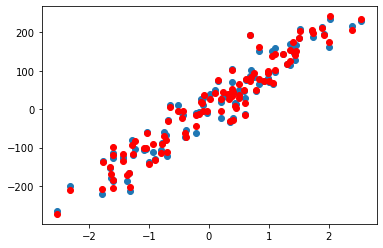

In [36]:
prediction= model(X, theta_final)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],prediction, c='r')

# Courbe d'apprentissage

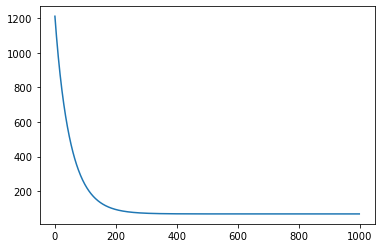

In [39]:
plt.plot(range(1000),cost_history)

In [40]:
# Méthode des moindres carrés 
def coef_determination(y, pred):
    u= ((y-pred)**2).sum()
    v= ((y-y.mean())**2).sum()
    return 1-u/v
    

In [41]:
coef_determination(y,prediction)

0.9468889085297653

Using matplotlib backend: Qt5Agg


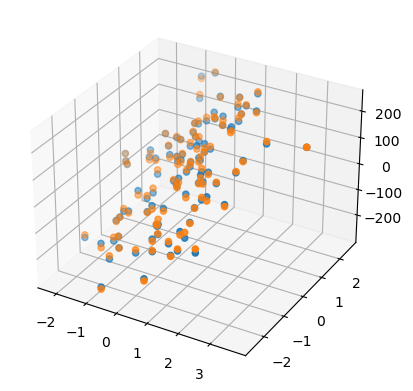

In [38]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
fig= plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],y)
ax.scatter(x[:,0],x[:,1],prediction)